In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
raw_df = pd.read_csv("../datasets/final_output.csv")
raw_df['month'] = pd.to_datetime(raw_df['Date']).dt.month
raw_df['day'] = pd.to_datetime(raw_df['Date']).dt.month
raw_df['year'] = pd.to_datetime(raw_df['Date']).dt.month
raw_df['SP_500_pct_change'] = raw_df['S&P 500'].pct_change()
raw_df['SP_500_return_direction'] = raw_df['SP_500_pct_change'].apply(lambda row: 1 if row > 0 else 0)
raw_df.tail()

,Date,AAA Corporate Bond,BAA Corporate Bond,1-MTH Treasury Maturity,5-YR Treasury Maturity,10-YR Treasury Maturity,Gold,1-YR Treasury Bill,3-MTH Treasury Bill,4-WK Treasury Bill,...,XLU,XLV,XLY,XOM,XTL,month,day,year,SP_500_pct_change,SP_500_return_direction
8396,2022-12-27,4.43,5.59,3.87,3.94,3.84,1823.1,4.52,4.35,3.62,...,71.349998,135.750000,127.330002,110.190002,80.769997,12,12,12,0.000000,0
8397,2022-12-28,4.43,5.59,3.86,3.97,3.88,1815.8,4.49,4.35,3.57,...,70.669998,134.869995,126.260002,108.379997,79.629997,12,12,12,-0.012021,0
8398,2022-12-29,4.43,5.59,4.04,3.94,3.83,1826.0,4.48,4.34,3.88,...,71.180000,136.339996,129.509995,109.199997,81.650002,12,12,12,0.017461,1
8399,2022-12-30,4.43,5.59,4.12,3.99,3.88,1826.2,4.51,4.30,3.95,...,70.500000,135.850006,129.160004,110.300003,81.610001,12,12,12,-0.002541,0
8400,2022-12-31,4.43,5.59,4.12,3.99,3.88,1826.2,4.51,4.30,3.95,...,70.500000,135.850006,129.160004,110.300003,81.610001,12,12,12,0.000000,0


In [3]:
raw_df['SP_500_return_direction'].value_counts()


0    5313
1    3088
Name: SP_500_return_direction, dtype: int64

In [4]:
raw_df['SP_500_return_direction'].value_counts()

0    5313
1    3088
Name: SP_500_return_direction, dtype: int64

In [5]:
raw_df['SP_500_return_direction_shift'] = raw_df['SP_500_return_direction'].shift(-1)
transformed_df = raw_df[:-1]
transformed_df.drop('Date', axis=1, inplace=True)

/var/folders/_v/r0z_prd90rqfd14czp946kb80000gn/T/ipykernel_48186/556625507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df.drop('Date', axis=1, inplace=True)


In [7]:
raw_df.columns

Index(['Date', 'AAA Corporate Bond', 'BAA Corporate Bond',
       '1-MTH Treasury Maturity', '5-YR Treasury Maturity',
       '10-YR Treasury Maturity', 'Gold', '1-YR Treasury Bill',
       '3-MTH Treasury Bill', '4-WK Treasury Bill', '6-MTH Treasury Bill',
       'Unemployment Rate', '4 WK Bank Discount', '4 Wk Coupon Equiv',
       '13 Wk Bank Discount', '13 Wk Coupon Equiv', '26 Wk Bank Discount',
       '26 Wk Coupon Equiv', 'CNY:Renminbi', 'JPY:Yen', 'EUR:Euro',
       'GBP:Pound (sterling)', 'INR:Indian rupee', 'CAD:Canadian dollar',
       'KRW:Won', 'Oil', 'NASDAQ', 'S&P 500', 'AAPL', 'ABBV', 'AMZN', 'BRK-B',
       'BTC-USD', 'CVX', 'GOOG', 'GOOGL', 'HD', 'IYR', 'JNJ', 'JPM', 'LLY',
       'MA', 'META', 'MSFT', 'NVDA', 'PG', 'QQQ', 'SMH', 'UNH', 'V', 'XLB',
       'XLE', 'XLF', 'XLI', 'XLP', 'XLU', 'XLV', 'XLY', 'XOM', 'XTL', 'month',
       'day', 'year', 'SP_500_pct_change', 'SP_500_return_direction',
       'SP_500_return_direction_shift'],
      dtype='object')

<Axes: >

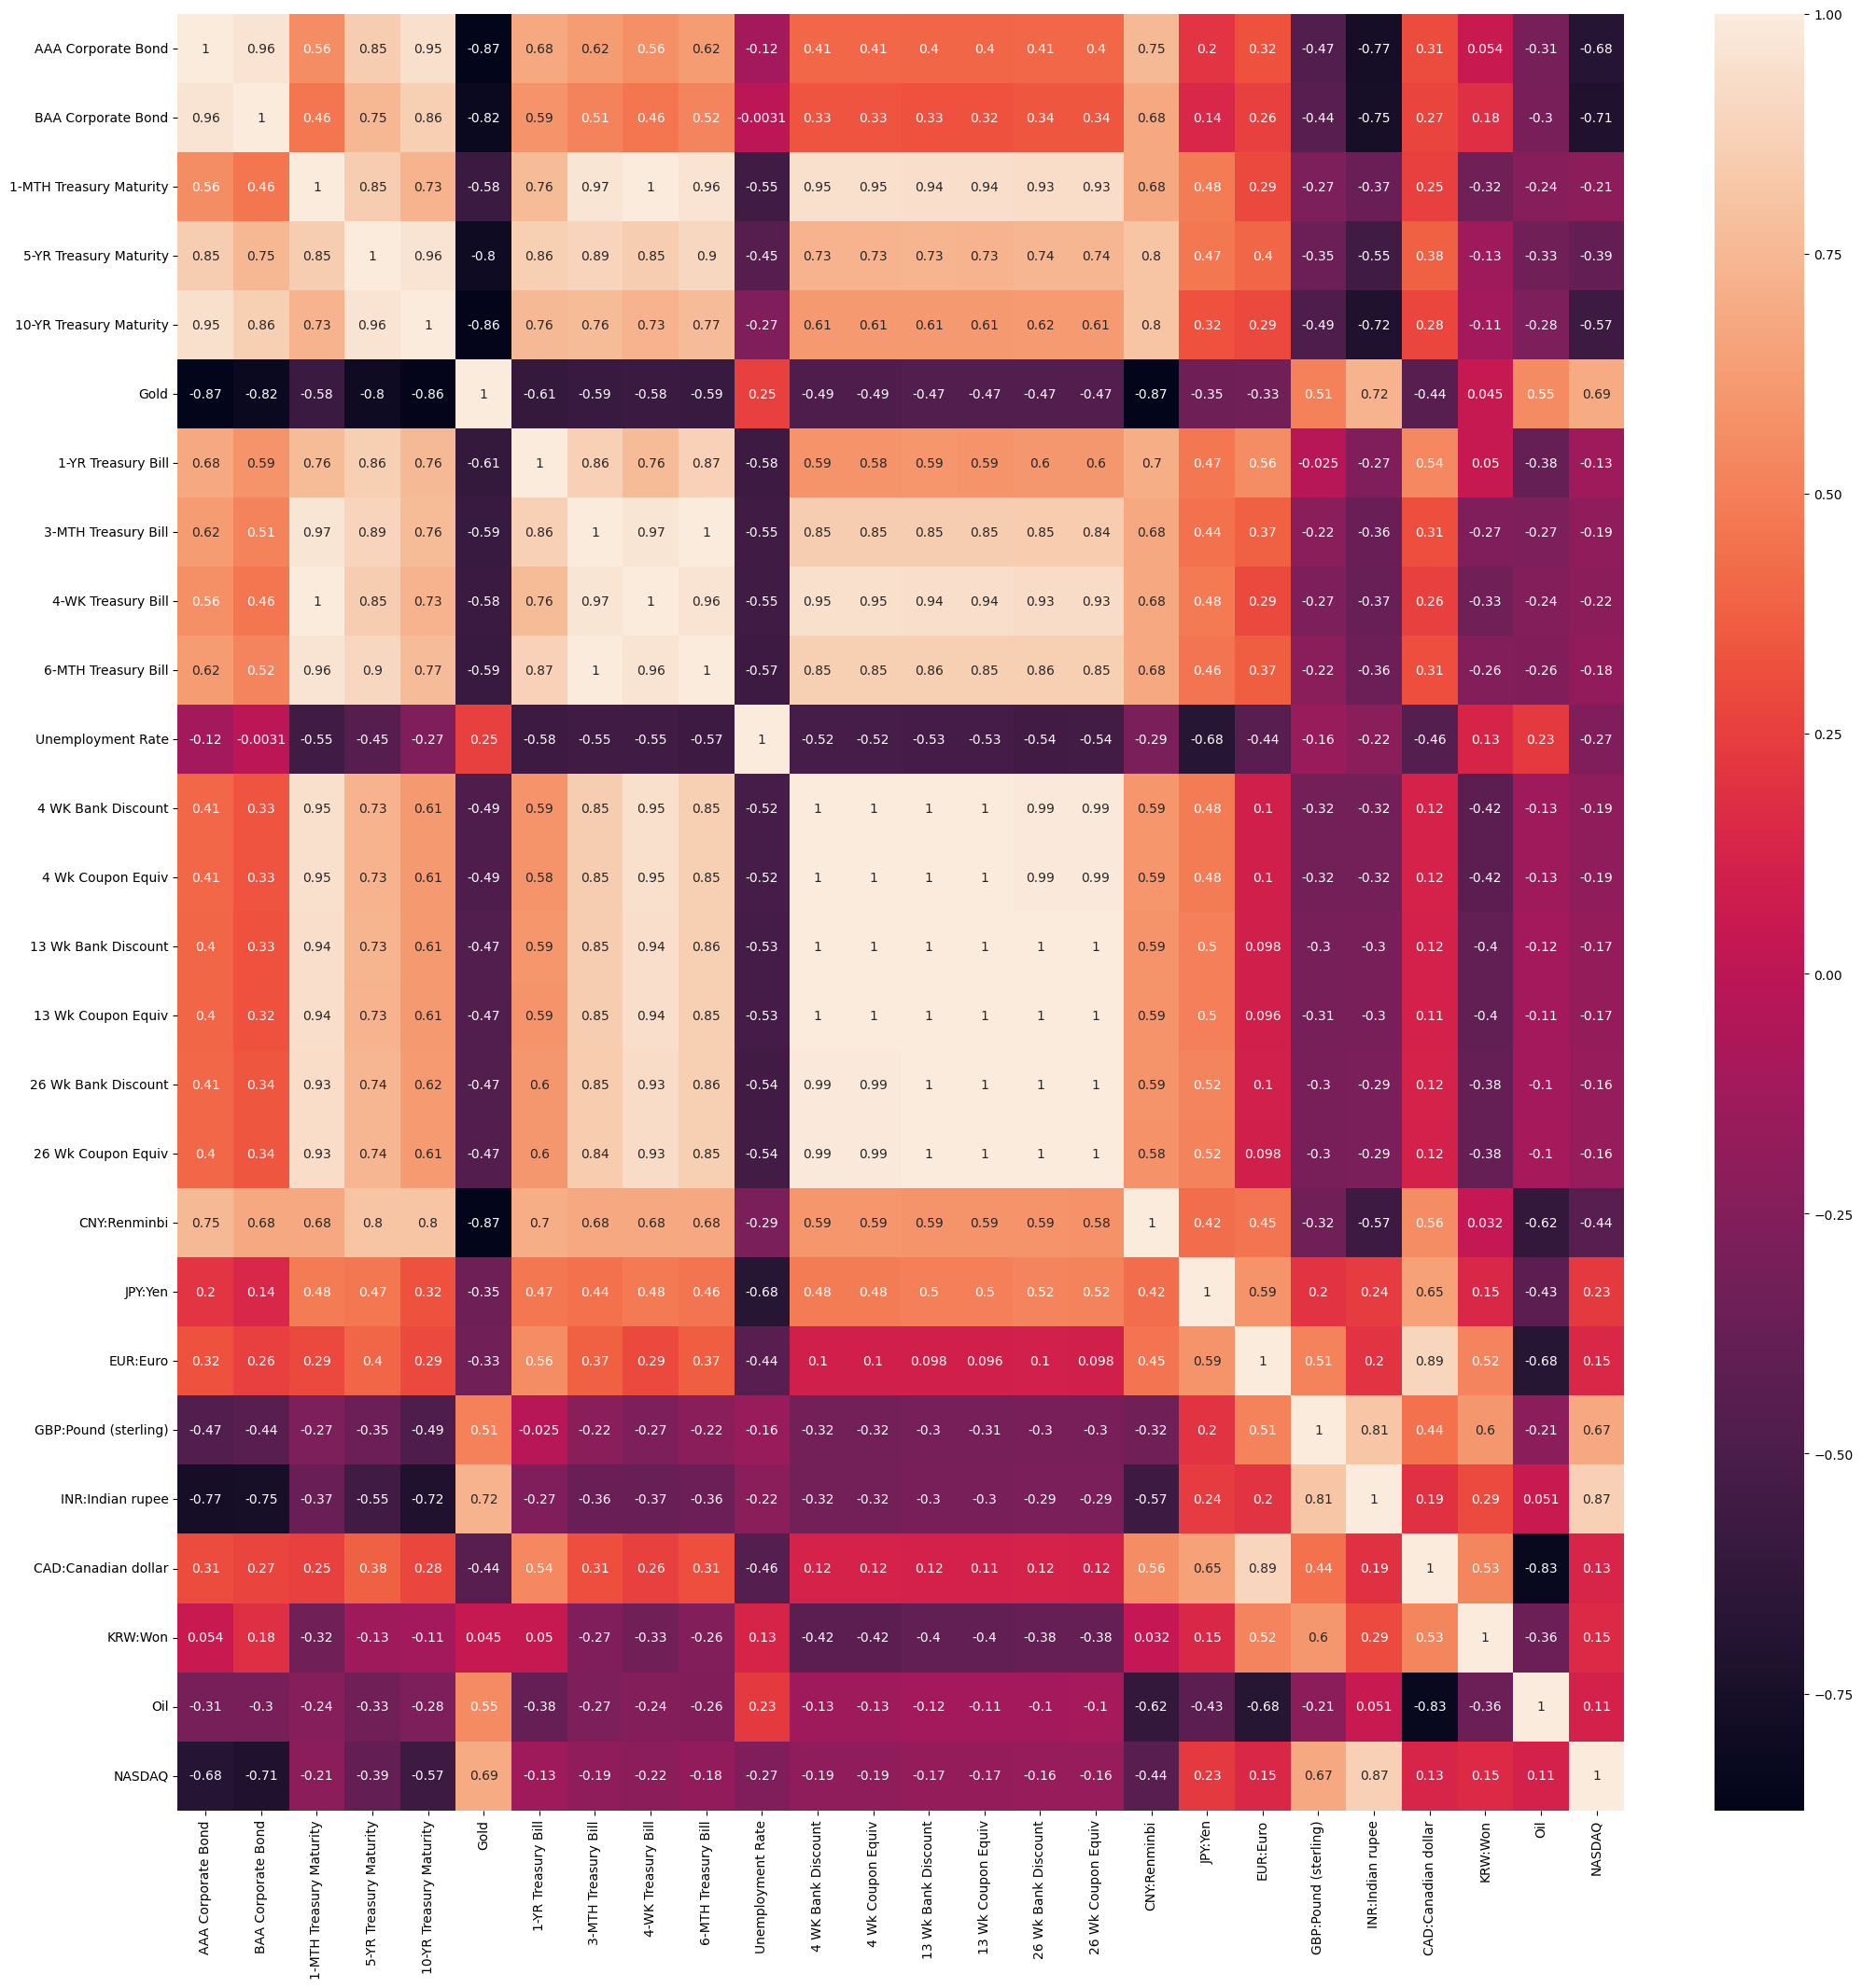

In [8]:
model_cols = ['AAA Corporate Bond', 'BAA Corporate Bond',
       '1-MTH Treasury Maturity', '5-YR Treasury Maturity',
       '10-YR Treasury Maturity', 'Gold', '1-YR Treasury Bill',
       '3-MTH Treasury Bill', '4-WK Treasury Bill', '6-MTH Treasury Bill',
       'Unemployment Rate', '4 WK Bank Discount', '4 Wk Coupon Equiv',
       '13 Wk Bank Discount', '13 Wk Coupon Equiv', '26 Wk Bank Discount',
       '26 Wk Coupon Equiv', 'CNY:Renminbi', 'JPY:Yen', 'EUR:Euro',
       'GBP:Pound (sterling)', 'INR:Indian rupee', 'CAD:Canadian dollar',
       'KRW:Won', 'Oil', 'NASDAQ']

fig = plt.figure(figsize=(25, 25))
sns.heatmap(transformed_df[model_cols].corr(),annot=True)

In [9]:
X = transformed_df[model_cols]
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(transformed_df[model_cols])
y = transformed_df['SP_500_return_direction_shift'] # for last column
X = scaled_data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [11]:
logreg = LogisticRegression(random_state=16, max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1567,    4],
       [ 947,    2]])

Text(0.5, 427.9555555555555, 'Predicted label')

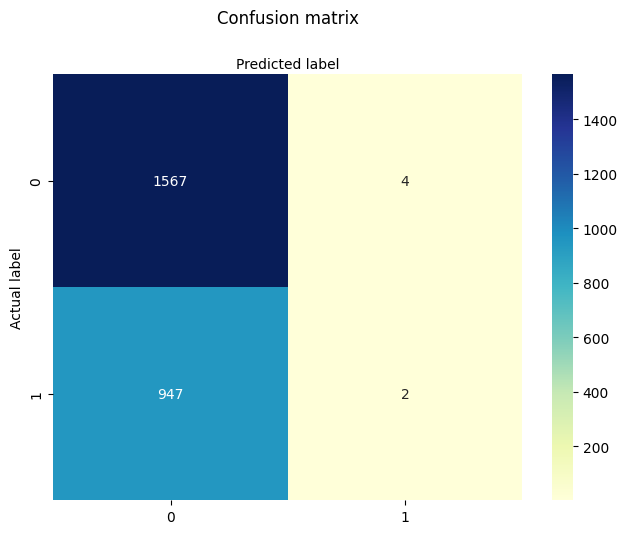

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=18).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

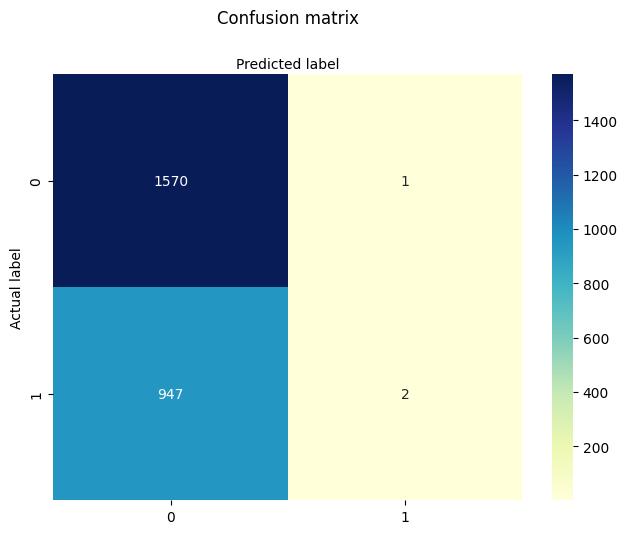

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Eigenvalues:
[1.43851643e+01 4.35279684e+00 4.00000451e+00 9.24526073e-01
 6.79859543e-01 5.84202754e-01 2.88803028e-01 2.27216892e-01
 1.38033129e-01 1.09580012e-01 9.14296030e-02 5.95494779e-02
 4.38789154e-02 4.05286854e-02 2.66702569e-02 2.03710616e-02
 1.41560797e-02 7.34642805e-03 5.33977965e-03 2.18973345e-03
 1.26942371e-03 1.52254475e-04 1.63165096e-05 6.96676461e-06
 2.16103686e-06 1.33323729e-06]

Variances (Percentage):
[5.53209686e+01 1.67395333e+01 1.53828012e+01 3.55544619e+00
 2.61453310e+00 2.24666618e+00 1.11064864e+00 8.73807086e-01
 5.30833448e-01 4.21411412e-01 3.51610456e-01 2.29009187e-01
 1.68744968e-01 1.55861002e-01 1.02565700e-01 7.83409094e-02
 5.44399787e-02 2.82521287e-02 2.05351691e-02 8.42104912e-03
 4.88181764e-03 5.85524422e-04 6.27483351e-05 2.67920586e-05
 8.31069075e-06 5.12722526e-06]



Text(0, 0.5, 'Explained variance (%)')

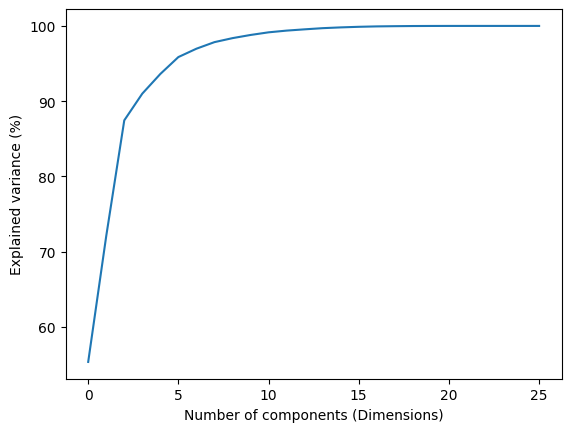

In [15]:
pca = PCA(n_components=None)
pca.fit(X)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [16]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5
0  6.097992  0.416101 -3.035331  2.191222 -1.116216  1.667707
1  6.097992  0.416101 -3.035331  2.191222 -1.116216  1.667707
2  6.097992  0.416101 -3.035331  2.191222 -1.116216  1.667707
3  6.068805  0.313207 -2.981492  2.075548 -1.160892  1.620928
4  6.114908  0.339721 -3.042687  2.083774 -1.132807  1.545624

Size: 
(8400, 6)


<Axes: >

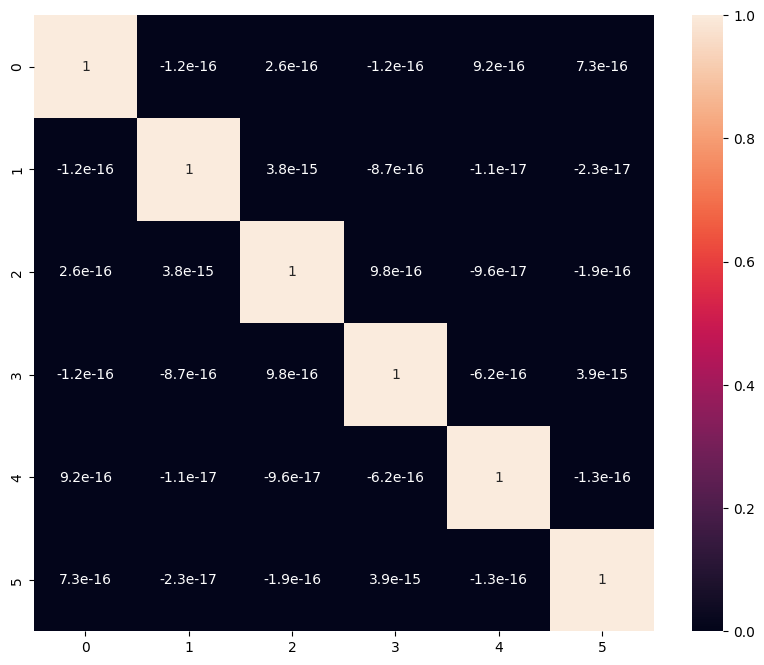

In [17]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(),annot=True)

In [18]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, shuffle=True)

In [19]:
logreg = LogisticRegression(random_state=16, max_iter=10000)
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


Text(0.5, 427.9555555555555, 'Predicted label')

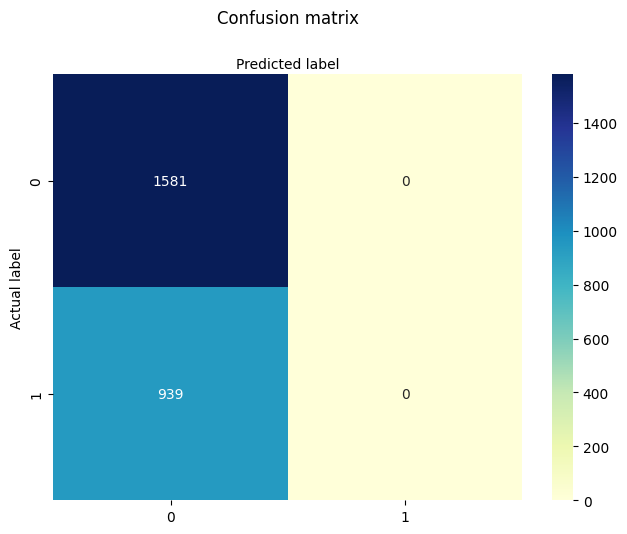

In [20]:
# Create our predictions
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, shuffle=True)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=18).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


Text(0.5, 427.9555555555555, 'Predicted label')

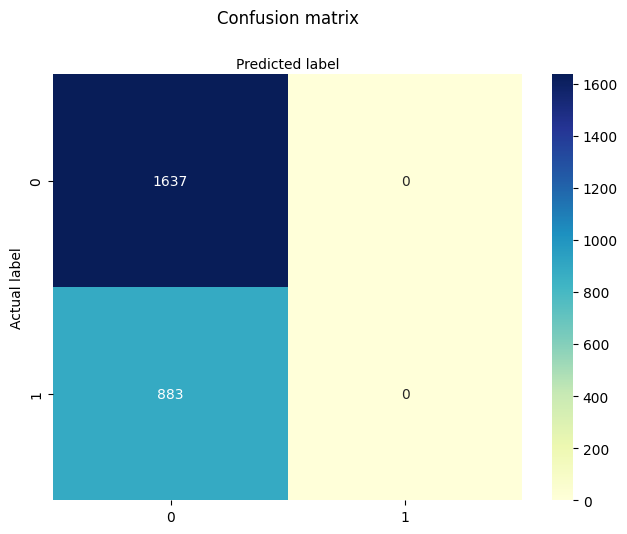

In [22]:
# Create our predictions
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')